In [2032]:
# %matplotlib widget

In [2033]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2034]:
X, y = make_blobs(500, centers=2, cluster_std=1.4)
y[y == 0] = -1

In [2035]:
n_samples, n_features = X.shape
w = np.random.randn(n_features)
b = np.random.randn()

In [2036]:
LR = 0.05
REG_PARAM = 0
EPOCHS = 1000

In [2037]:
def decision_func(features: ndarray = X) -> ndarray:
    return np.dot(features, w) + b

In [2038]:
def loss() -> float:
        return np.mean(np.maximum(0, 1 - y * decision_func())) + REG_PARAM*np.sum(w**2)

In [2039]:
def fit(batch_size: int = 32):
    for e in range(EPOCHS):
        print(f'Epoch {e}/{EPOCHS}, Loss: {loss()}{20*" "}', end='\r')
        global w, b

        batch_mask = np.random.choice(y.size, size=batch_size, replace=False)
        X_batch, y_batch = X[batch_mask], y[batch_mask]

        for x_i, y_i in zip(X_batch, y_batch):
            dL_dw = -y_i * x_i * ((y_i * np.dot(x_i, w) + b) < 1) + 2*REG_PARAM*w
            dL_db = -y_i * ((y_i * np.dot(x_i, w) + b) < 1)

            w -= LR*dL_dw
            b -= LR*dL_db

In [2040]:
def draw_decision_boundary(X: ndarray, y: ndarray):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, X.shape[0]),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, X.shape[0]))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    pred = decision_func(features=X_grid)
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax.contour(xx, yy, pred, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors=['r', 'k', 'r'])
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

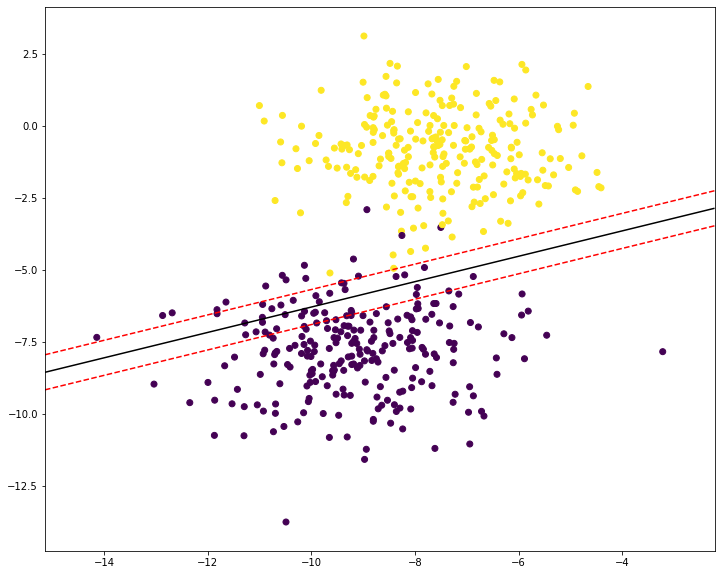

In [2051]:
fit()
draw_decision_boundary(X, y)

In [2052]:
np.count_nonzero(y == np.sign(decision_func(X))) / (y == np.sign(decision_func(X))).size

0.938